In [10]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [11]:
######### AirPassengers

In [12]:
train = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Time Series in IOT\train_ML_IOT.csv",index_col=0,parse_dates=['DateTime'])
train.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [13]:
train1= train[train["Junction"]==1]['Vehicles']
downsample1 = train1.resample('M').sum()
downsample1 = downsample1.reset_index()
y_train = downsample1.iloc[:-4,1]
y_test = downsample1.iloc[-4:,1]

In [14]:
### Moving average

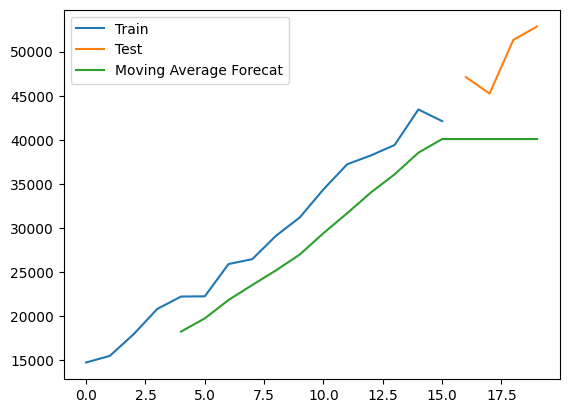

9559.921911814972


In [15]:
span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [16]:
####### SimpleExpSmoothing

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


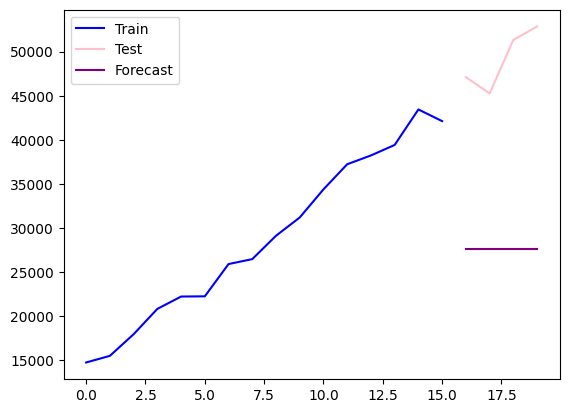

RMSE =  21729.159563308946


In [17]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [18]:
####### Holt linear trend method

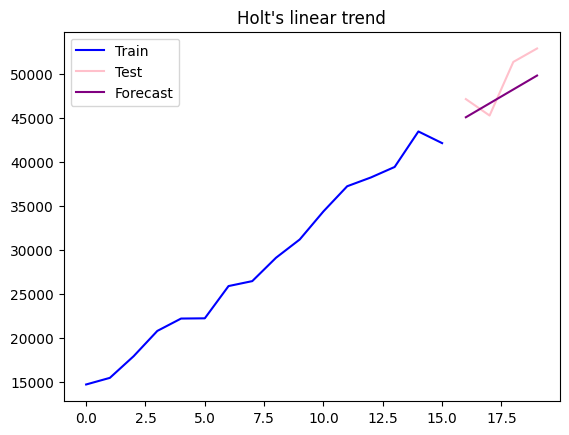

RMSE =  2517.3319574607544


In [19]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [20]:
####### Holt Exponential trend method

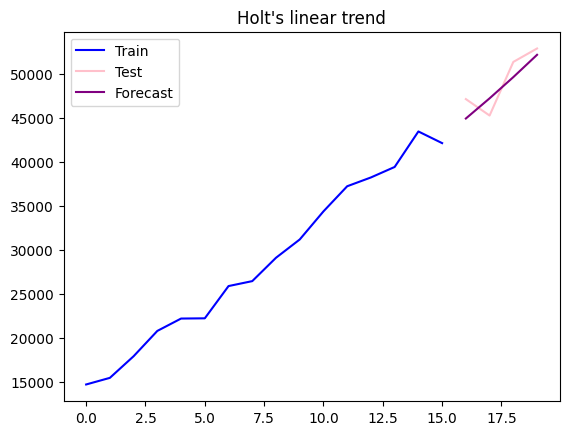

RMSE =  1743.059210998391


In [21]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [22]:
fit1.params

{'smoothing_level': 0.8064285714285714,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 14736.0,
 'initial_trend': 1.0509636264929425,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
###### HW Additive

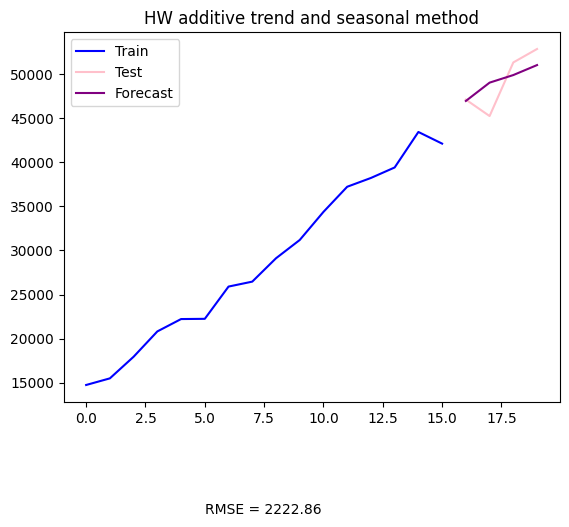

In [24]:
alpha = 0.28
beta = 0.03
gamma=0.78
hw_add= ExponentialSmoothing(y_train, seasonal_periods=6, trend='add',seasonal='add')
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(5,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [25]:
### HW Multiplicative

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


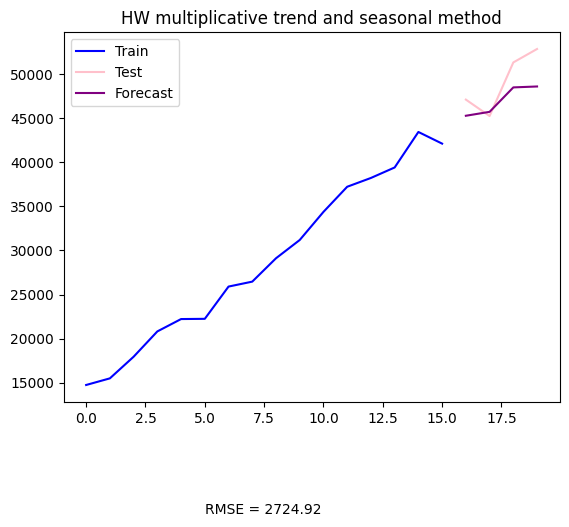

In [26]:
alpha = 1
beta = 0.08
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=6, trend='add',seasonal='mul')
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(5,100,"RMSE = "+str(error))
plt.title("HW multiplicative trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [27]:
######### Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=264.457, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.679, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.623, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.004, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=266.213, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=264.707, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=277.778, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.683 seconds


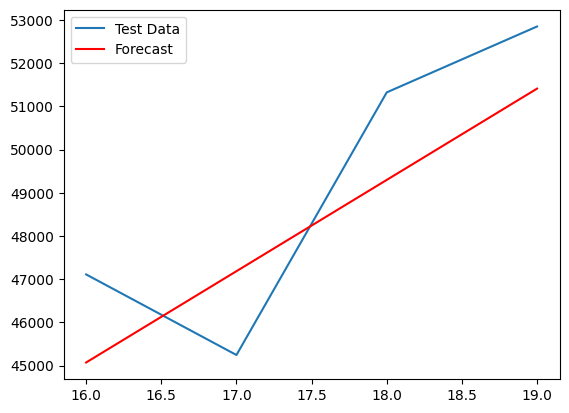

In [28]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

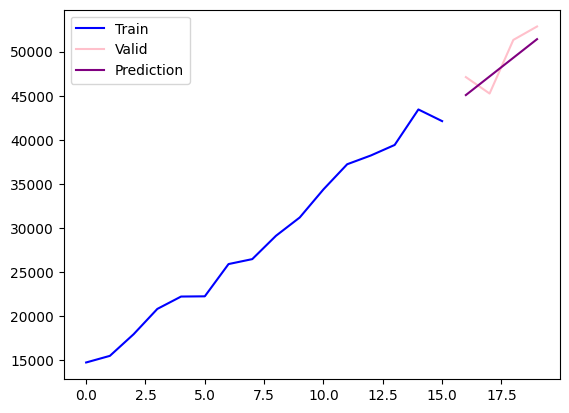

In [29]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [30]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 1877.837


In [31]:
############# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=214.487, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=212.655, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=251.791, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=216.582, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=214.905, Time=0.22 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=212.918, Time=0.14 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=217.644, Time=0.17 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=214.746, Time=0.23 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=210.820, Time=0.10 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=214.452, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=213.230, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=215.932, Time=0.10 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=215.217, Time

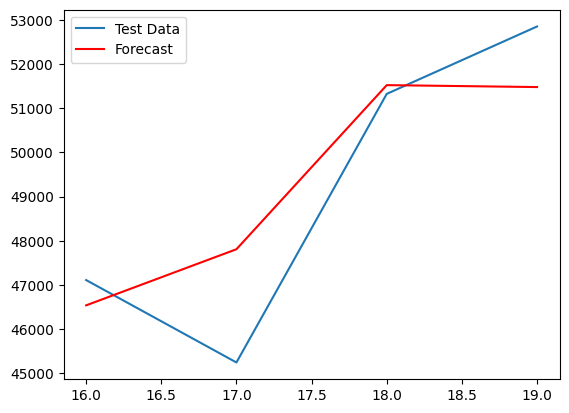

In [32]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

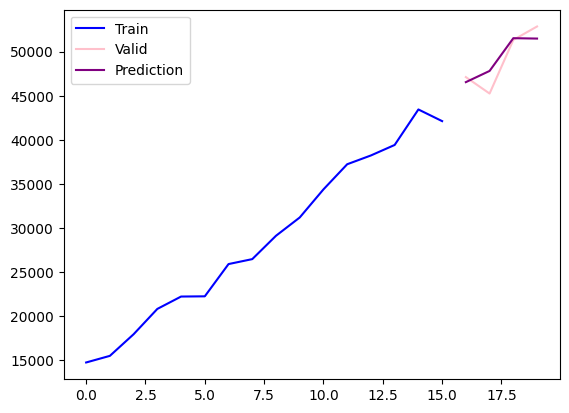

In [33]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 1485.348


In [ ]:
##### Junction 2

In [35]:
train2= train[train["Junction"]==2]['Vehicles']
downsample2 = train2.resample('M').sum()
downsample2 = downsample2.reset_index()
y_train = downsample2.iloc[:-4,1]
y_test = downsample2.iloc[-4:,1]

In [36]:
### Moving average

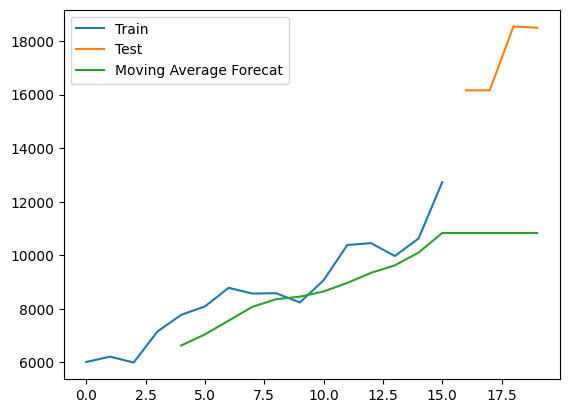

6613.827504554379


In [37]:
span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [38]:
####### SimpleExpSmoothing

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


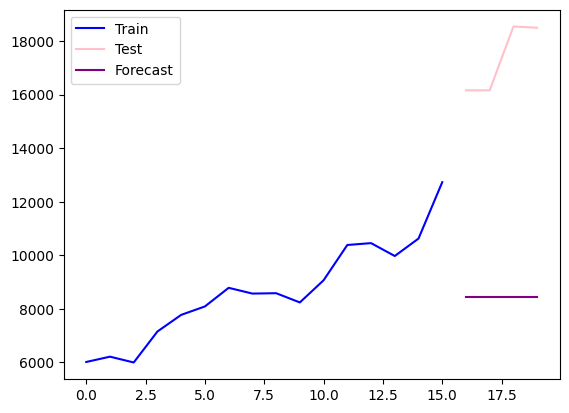

RMSE =  8972.883279108453


In [39]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [40]:
####### Holt linear trend method

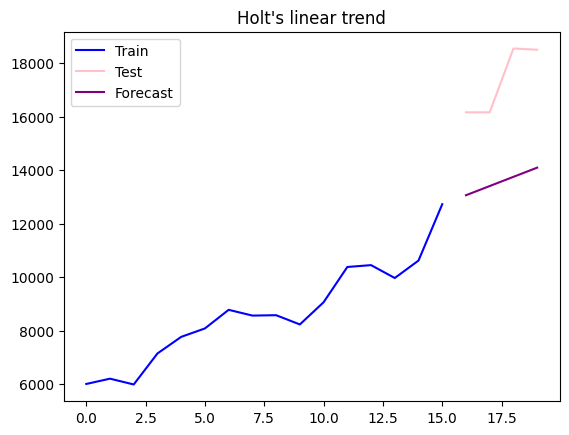

RMSE =  3857.6919132203357


In [41]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [42]:
####### Holt Exponential trend method

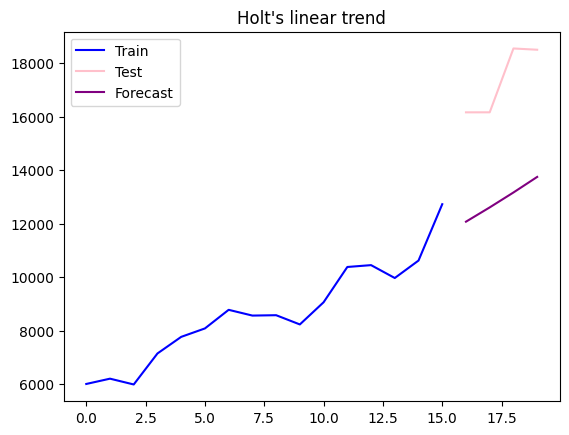

RMSE =  4493.39472602881


In [43]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [44]:
fit1.params

{'smoothing_level': 0.16999999999999998,
 'smoothing_trend': 0.16999999999999998,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 6014.0,
 'initial_trend': 1.0329231792484204,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
###### HW Additive

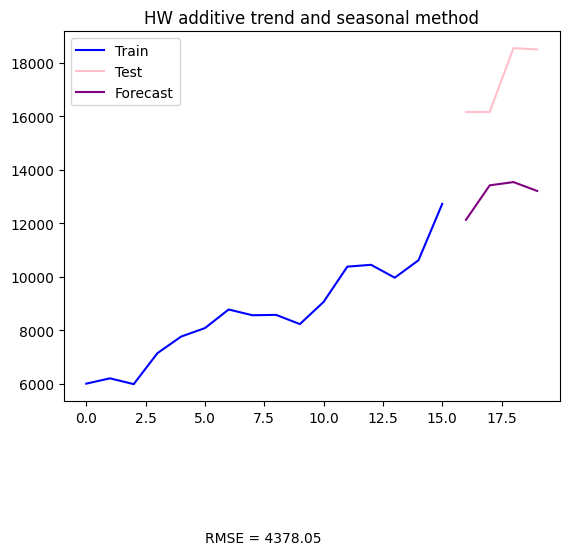

In [46]:
alpha = 0.28
beta = 0.03
gamma=0.78
hw_add= ExponentialSmoothing(y_train, seasonal_periods=6, trend='add',seasonal='add')
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(5,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [47]:
### HW Multiplicative

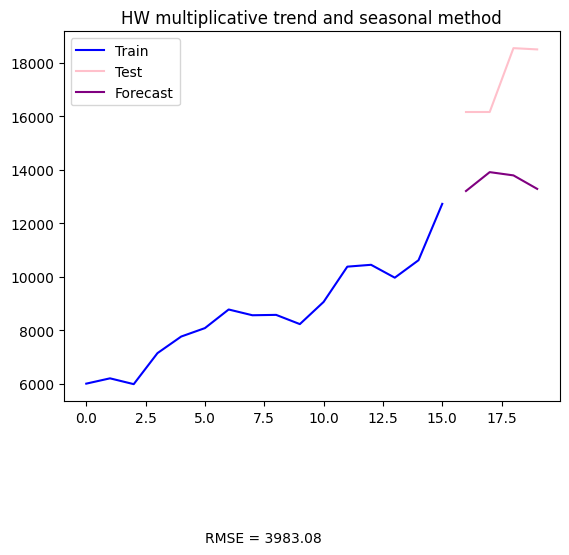

In [48]:
alpha = 1
beta = 0.08
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=6, trend='add',seasonal='mul')
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(5,100,"RMSE = "+str(error))
plt.title("HW multiplicative trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [49]:
######### Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=242.516, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.519, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=244.062, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.830, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.397 seconds


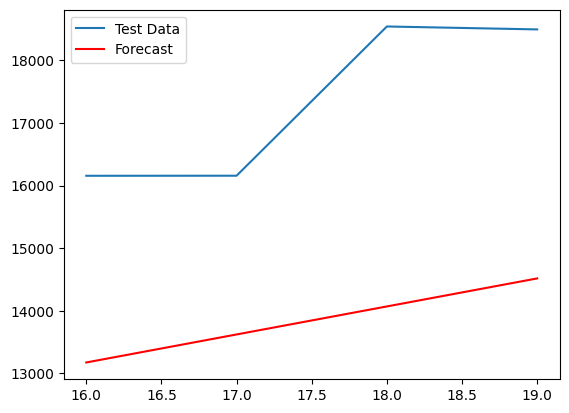

In [50]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

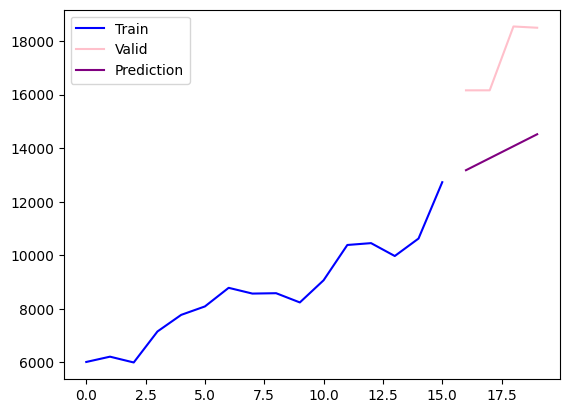

In [51]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [52]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 3575.852


In [53]:
############# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=196.768, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=198.752, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=197.123, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=214.643, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=198.767, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=198.764, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=200.759, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=196.511, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=199.001, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=200.095, Time=0.09 sec
 ARIMA(2,0,0)(0,1,0)[4] intercept   : AIC=197.798, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=196.551, Time=0.17 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=195.203, Time=0.10 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=197.172, 

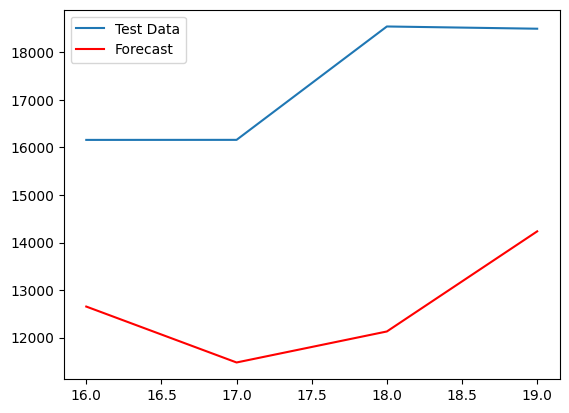

In [54]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=4)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

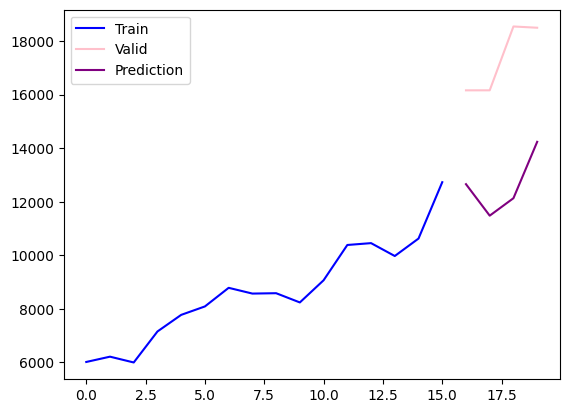

In [55]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [57]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4834.068
